# Linear Regression with one variable
Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

### Accessing and storing data from csv files

In [3]:
# Popultation in 10,000s
# Profit in 10,000$
population_train = []
profit_train = []
with open('Data/ex1data1.csv', newline='') as pop_profit_train:
    reader = csv.reader(pop_profit_train)
    for row in reader:
        population_train.append(float(row[0]));
        profit_train.append(float(row[1]));    
population_train = np.array(population_train)
profit_train = np.array(profit_train)    

### Plotting data points

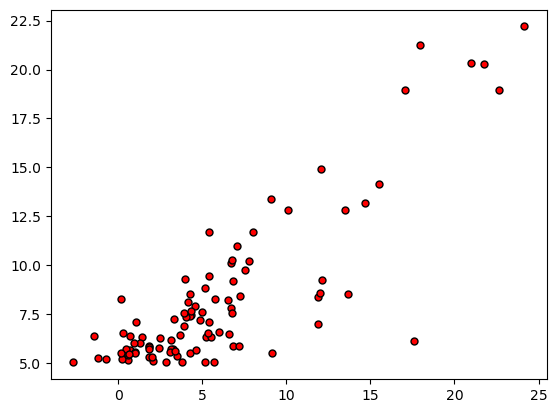

In [4]:
plt.plot(profit_train, population_train, 'ro', ms='5', mec='k')

### Our Model

At w = 1.3065769949111345 and b = 0.1167827010309278, cost_func = 33.53928474333497
At w = 0.9157227545702529 and b = -1.1353931411828935, cost_func = 10.341336184606526
At w = 0.9997867489609259 and b = -1.9721767942468635, cost_func = 9.627680431606114
At w = 1.0583675927886493 and b = -2.55529793728847, cost_func = 9.281119204068114
At w = 1.0991902456787777 and b = -2.961651797353845, cost_func = 9.112824218807102
At w = 1.1276379237950025 and b = -3.24482359031737, cost_func = 9.031097817197734
At w = 1.1474619757100613 and b = -3.4421547152567906, cost_func = 8.991410332097349
At w = 1.1612765665784388 and b = -3.579666903396495, cost_func = 8.972137533557635
At w = 1.170903403800132 and b = -3.6754936610495235, cost_func = 8.962778392694643
At w = 1.1776119625823624 and b = -3.742271505301142, cost_func = 8.958233462828188
Final w = 1.1822480052540147 and b = -3.788419261551181


[Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, 'Cost function value')]

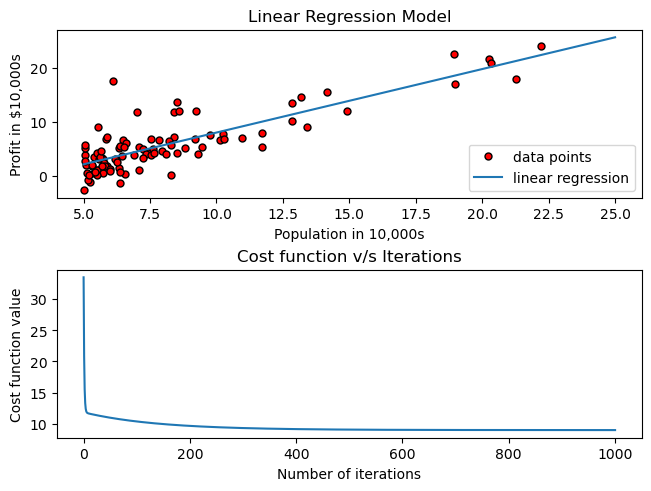

In [49]:
# predict model
def predict(x, w, b):
    return w*x + b

# cost function
def cost_func(x, y , w, b):
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (w*x[i] + b - y[i])**2
    return total_error / n

# updating weights using grading descent
def update_weights(x, y, w, b, learning_rate):
    n = len(x)
    pd_w = 0
    pd_b = 0

    # Calculate the 'summation part' of partial derivatives
    for i in range(n):
        pd_w += x[i] * ((w*x[i] + b) - y[i])
        pd_b += (w*x[i] + b)- y[i]

    w -= learning_rate * (pd_w/n)
    b -= learning_rate * (pd_b/n)

    return w, b

# training
def training_model(x, y, w, b, learning_rate, total_iterations):

    cost_history = []
    
    for i in range(total_iterations):
        w, b = update_weights(x, y, w, b, learning_rate)
        cost = cost_func(x, y, w, b)
        cost_history.append(cost)

        if (i % math.ceil(total_iterations / 10) == 0):
            print(f"At w = {w} and b = {b}, cost_func = {cost}")
    
    return w, b, cost_history

# testing / plot the damn predict model
learn_rate = 0.02
epoch = 1000
w, b, cost_history = training_model(population_train, profit_train, 0, 0, learn_rate, epoch)

print(f"Final w = {w} and b = {b}")

model_x = np.linspace(5, 25, 50)
model_y = predict(model_x, w, b)

fig, (linreg, cost_graph) = plt.subplots(2, constrained_layout=True)

linreg.set_title("Linear Regression Model")
linreg.plot(population_train, profit_train, 'ro', ms='5', mec='k')
linreg.plot(model_x, model_y)
linreg.legend(['data points', 'linear regression'])
linreg.set(xlabel='Population in 10,000s', ylabel='Profit in $10,000s')

cost_graph.set_title("Cost function v/s Iterations")
cost_graph.plot(np.linspace(0,epoch, len(cost_history)), cost_history)
cost_graph.set(xlabel='Number of iterations', ylabel='Cost function value')